In [270]:
import pandas_datareader
import pandas as pd
import numpy as np

In [271]:
pandas_datareader.__version__

'0.10.0'

In [272]:
from pandas_datareader import data

In [273]:
start = '2022/01/01'

In [274]:
end = '2022/02/25' 

In [299]:
df = data.DataReader(['VTI', 'VOX', 'VCR', 'VDC', 'VDE', 'VFH', 'VHT', 'VIS', 'VGT', 'VAW', 'VNQ', 'VPU'], 'yahoo',start=start, end=end)

In [300]:
prices = df['Adj Close']

In [301]:
prices = prices.dropna()

In [303]:
prices.columns = ['Total Stock Market', 'Communication Services', 'Consumer Discretionary', 'Consumer Staples', 'Energy', 'Financials', 'Health Care', 'Industrials', 'Information Technology', 'Materials', 'Real Estate', 'Utilities']

In [304]:
#prices.plot(figsize=(20,10), kind='line')

In [305]:
pct_change = prices.pct_change()

In [306]:
#pct_change

In [307]:
#pct_change.plot(figsize=(20,10), kind='line')

In [308]:
ret_index = (1 + pct_change).cumprod()

In [309]:
ret_index[0:1] = 1

In [310]:
#ret_index

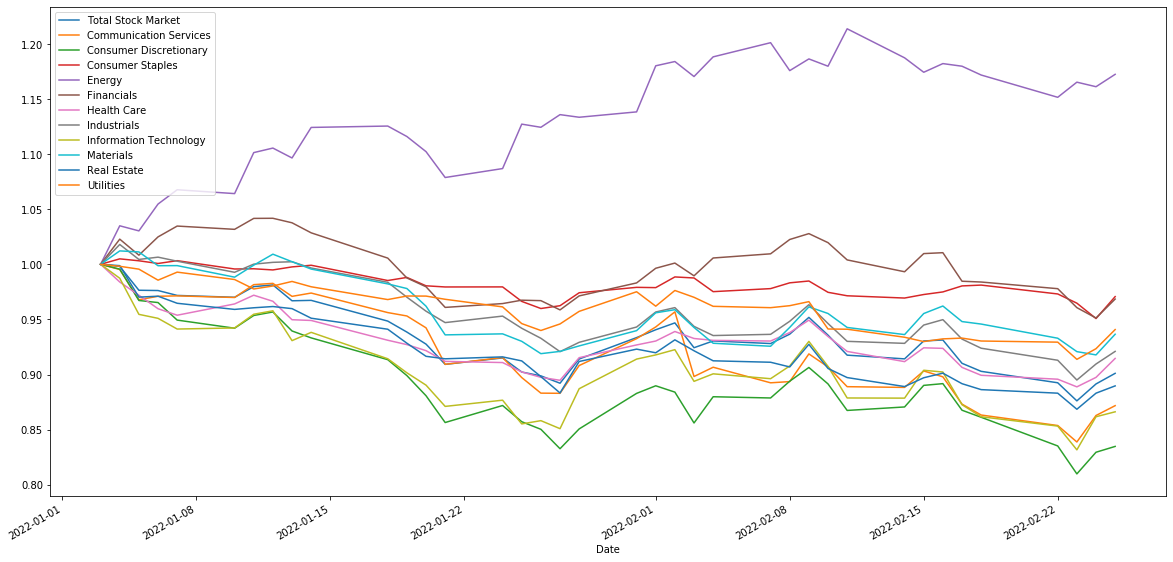

In [311]:
ret_index.plot(figsize=(20,10), kind='line')

In [335]:
ret_index.iloc[-1]-1

Total Stock Market       -0.098942
Communication Services   -0.128269
Consumer Discretionary   -0.165264
Consumer Staples         -0.029310
Energy                    0.172410
Financials               -0.031535
Health Care              -0.085414
Industrials              -0.079024
Information Technology   -0.133853
Materials                -0.063447
Real Estate              -0.110339
Utilities                -0.059222
Name: 2022-02-25 00:00:00, dtype: float64

In [312]:
ret = prices.pct_change().mean()
ret

Total Stock Market       -0.002725
Communication Services   -0.003527
Consumer Discretionary   -0.004696
Consumer Staples         -0.000777
Energy                    0.004440
Financials               -0.000786
Health Care              -0.002352
Industrials              -0.002151
Information Technology   -0.003681
Materials                -0.001695
Real Estate              -0.003083
Utilities                -0.001604
dtype: float64

In [313]:
var = prices.pct_change().var()
var

Total Stock Market        0.000179
Communication Services    0.000359
Consumer Discretionary    0.000359
Consumer Staples          0.000056
Energy                    0.000274
Financials                0.000163
Health Care               0.000120
Industrials               0.000147
Information Technology    0.000402
Materials                 0.000155
Real Estate               0.000149
Utilities                 0.000092
dtype: float64

In [314]:
sd = prices.pct_change().std()
sd

Total Stock Market        0.013391
Communication Services    0.018936
Consumer Discretionary    0.018941
Consumer Staples          0.007472
Energy                    0.016567
Financials                0.012757
Health Care               0.010937
Industrials               0.012123
Information Technology    0.020041
Materials                 0.012438
Real Estate               0.012197
Utilities                 0.009590
dtype: float64

In [315]:
from scipy import stats

In [318]:
stats.ttest_ind(pct_change['Energy'], pct_change['Total Stock Market'], equal_var=True, nan_policy='omit')

Ttest_indResult(statistic=2.045932210053352, pvalue=0.044416454776060564)